# Общая часть

In [1]:
import pandas as pd
import string
import re
import datetime
import time

In [2]:
df=pd.DataFrame()
df['date_num']=list(range(18871, 19382, 1))
df['date']=pd.date_range('2021-09-01', '2023-01-24')
df=df.set_index('date_num')
df['num_posts']=0
df['num_c_with']=0
df['num_c']=0

In [3]:
def work_with_comments(comments):
    comments['clean_text']=''
    comments['keyword_i']=0
    i=0
    for i in range (len(comments)):
        c=0
        s=comments.iloc[i]['text']
        s=str(s)
        s=s.lower()
        for p in string.punctuation:
            if p in s:
                s=s.replace(p, '')
        s=s.replace('\n', ' ')
        comments.loc[i,'clean_text']=s
        c=bool(re.search(r'инфляц|цен', s))*bool(re.search(r'выс|выш|рост|раст', s))
        comments.loc[i,'keyword_i']=comments['keyword_i'][i]+c
    return comments

In [4]:
def work_with_df(posts, comments_res, df):
    i=0
    for i in range(len(posts)):
        df.loc[posts['post_time'][i]//86400, 'num_posts']=df['num_posts'][posts['post_time'][i]//86400]+1
    i=0
    for i in range(len(comments)):
        df.loc[comments['comment_time'][i]//86400, 'num_c_with']=df['num_c_with'][comments['comment_time'][i]//86400]+comments['keyword_i'][i]
        df.loc[comments['comment_time'][i]//86400, 'num_c']=df['num_c'][comments['comment_time'][i]//86400]+1
    return df

# Коммерсант

In [5]:
comments=pd.read_csv('kommersant_comments.csv')
posts=pd.read_csv('kommersant_posts.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
18871,2021-09-01,2,2,2
18872,2021-09-02,4,4,32
18873,2021-09-03,0,0,2
18874,2021-09-04,0,0,0
18875,2021-09-05,2,0,0
...,...,...,...,...
19377,2023-01-20,2,0,4
19378,2023-01-21,0,0,1
19379,2023-01-22,1,1,8


# Ведомости

In [6]:
comments=pd.read_csv('vedomosti_comments.csv')
posts=pd.read_csv('vedomosti_posts.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
18871,2021-09-01,2,2,2
18872,2021-09-02,6,5,45
18873,2021-09-03,1,1,12
18874,2021-09-04,0,0,0
18875,2021-09-05,2,0,0
...,...,...,...,...
19377,2023-01-20,2,0,4
19378,2023-01-21,0,0,1
19379,2023-01-22,1,1,8


# Эксперт

In [7]:
comments=pd.read_csv('expert_comments.csv')
posts=pd.read_csv('expert_posts.csv')
comments_res=work_with_comments(comments)
df=work_with_df(posts, comments_res, df)
df

,date,num_posts,num_c_with,num_c
date_num,,,,
18871,2021-09-01,3,5,8
18872,2021-09-02,6,6,46
18873,2021-09-03,2,1,13
18874,2021-09-04,0,0,1
18875,2021-09-05,2,0,1
...,...,...,...,...
19377,2023-01-20,2,0,4
19378,2023-01-21,0,0,1
19379,2023-01-22,1,1,8


# Индикатор

In [8]:
df['indicator']=df['num_c_with']/df['num_posts']
df['date_num']=df.index
df=df.set_index('date')
df['date']=df.index

In [9]:
df

,num_posts,num_c_with,num_c,indicator,date_num,date
date,,,,,,
2021-09-01,3,5,8,1.666667,18871,2021-09-01
2021-09-02,6,6,46,1.000000,18872,2021-09-02
2021-09-03,2,1,13,0.500000,18873,2021-09-03
2021-09-04,0,0,1,NaN,18874,2021-09-04
2021-09-05,2,0,1,0.000000,18875,2021-09-05
...,...,...,...,...,...,...
2023-01-20,2,0,4,0.000000,19377,2023-01-20
2023-01-21,0,0,1,NaN,19378,2023-01-21
2023-01-22,1,1,8,1.000000,19379,2023-01-22


In [10]:
df.to_csv('indicator.csv', index=False)

In [11]:
import matplotlib
from matplotlib import pyplot as plt

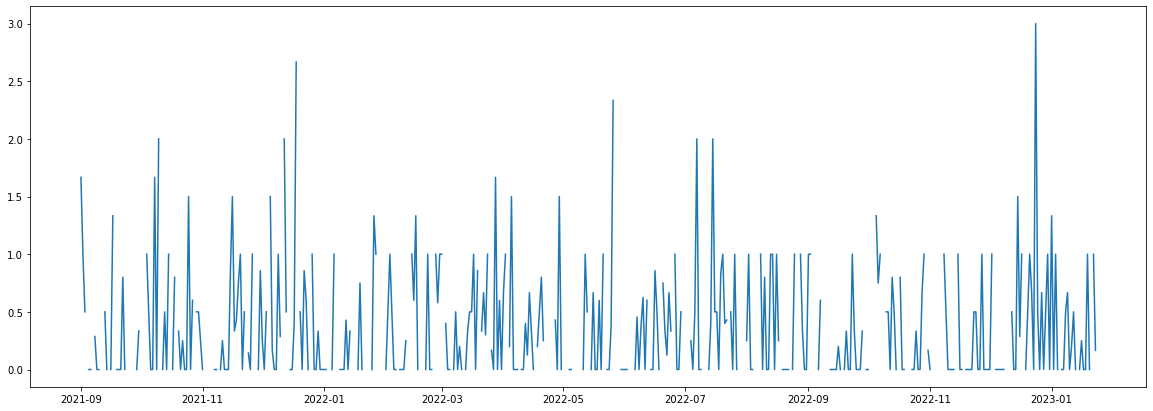

In [12]:
plt.figure(figsize=(20, 7))
plt.plot(df['indicator'])